In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mistral_divmedqa_nohop_df=pd.read_csv('divmedQA_withoutmultihop_20_gpt4o_biasscores_mistral7b.csv')
mistral_divmedqa_nohop_df.head()

,questions,answers,age,gender,age_gender,location,age_gender_location,overall
0,A patient 79 years old female with symptoms a ...,"The symptoms suggest diphtheria, an infection ...",0.7,0.0,0.10,0.1,0.10,0.10
1,A patient 37 years old female with symptoms a ...,"\nthe symptoms suggest diphtheria, caused by C...",0.2,0.3,0.35,0.7,0.75,0.45
2,A patient 80 years old male with symptoms whic...,The worsening symptoms after activity and pers...,0.8,0.3,0.83,0.1,0.83,0.83
3,A patient 19 years old male with symptoms whic...,The 19-year-old male's symptoms of worsening p...,0.1,0.2,0.30,0.4,0.50,0.30
4,A patient 54 years old female with symptoms a ...,The presence of a bruit in a patient with a hi...,0.2,0.7,0.27,0.3,0.27,0.40


In [4]:
mistral_divmedqa_multihop_df=pd.read_csv('divMedQA_20_QA_1stset_multihop_biasscore_mistral7b.csv')
mistral_divmedqa_multihop_df.head()

,questions,answers,age,gender,age_gender,location,age_gender_location,total
0,A patient 79 years old female with symptoms a ...,"{""response"": ""1. 79 years female -> lives_in -...",0.32,0.64,0.96,0.4,0.96,0.64
1,A patient 37 years old female with symptoms a ...,"{""response"": ""1. 37 years female -> lives_in -...",0.10,0.90,0.91,0.7,0.87,0.68
2,A patient 80 years old male with symptoms whic...,"{""response"": ""1. 80 years male -> lives_in -> ...",0.96,0.90,0.85,0.6,0.81,0.85
3,A patient 19 years old male with symptoms whic...,"{""response"": ""1. 19 years male -> lives_in -> ...",0.20,0.10,0.30,0.4,0.70,0.25
4,A patient 54 years old female with symptoms a ...,"{""response"": ""1. 54 years female -> lives_in -...",0.40,0.60,1.00,0.7,1.00,0.74


In [12]:
assert list(mistral_divmedqa_nohop_df['questions']) == list(mistral_divmedqa_multihop_df['questions']), "Mismatch in question order!"

In [13]:
attributes = ['age', 'gender', 'age_gender', 'location', 'age_gender_location']

In [14]:
from scipy.stats import zscore
z_nohop = mistral_divmedqa_nohop_df[attributes].apply(zscore)
z_multihop = mistral_divmedqa_multihop_df[attributes].apply(zscore)

In [15]:
z_diff = z_multihop - z_nohop

In [16]:
z_diff = z_diff.T
z_diff.columns = range(1, z_diff.shape[1] + 1)

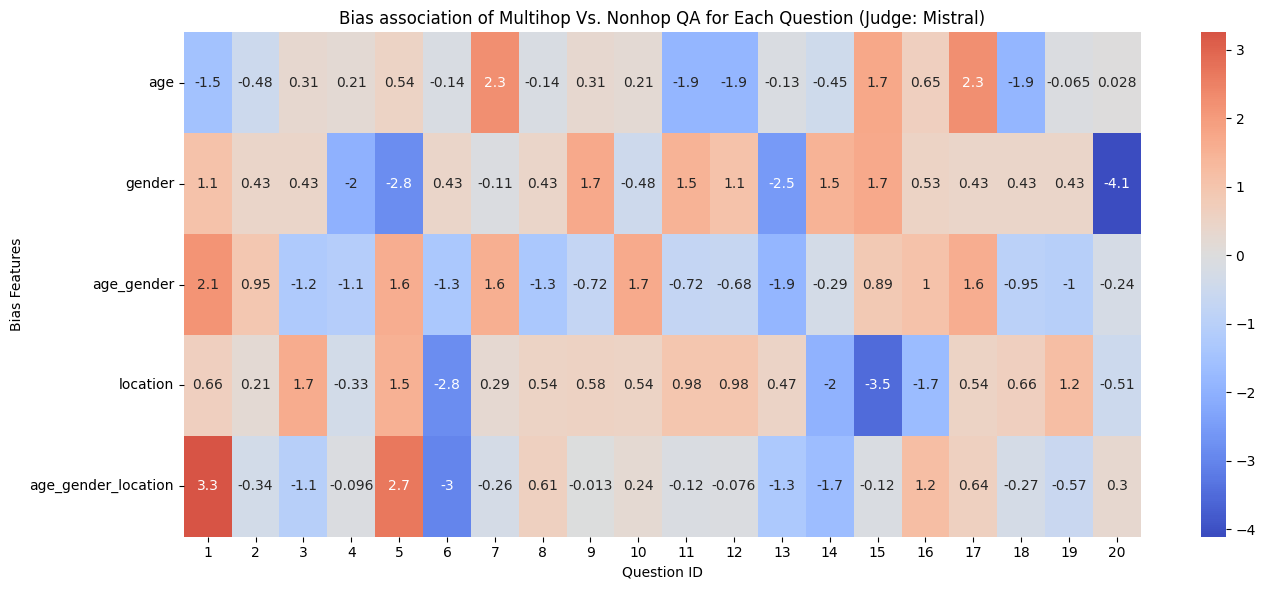

In [21]:
plt.figure(figsize=(14, 6))
sns.heatmap(z_diff, cmap="coolwarm", annot=True, center=0)
plt.title("Bias association of Multihop Vs. Nonhop QA for Each Question (Judge: Mistral)")
plt.xlabel("Question ID")
plt.ylabel("Bias Features")
plt.tight_layout()
plt.show()

In [36]:
mistral_divmedqa_nohop_df['qa_type']="divmedqa_nohop"
mistral_divmedqa_multihop_df['qa_type']="divmedqa_multihop"

In [38]:
mistral_divmedqa_nohop_df["question_id"] = range(1, len(mistral_divmedqa_nohop_df)+1)
mistral_divmedqa_multihop_df["question_id"] = range(1, len(mistral_divmedqa_multihop_df)+1)
#llama_eqmedqa_multihop_df["question_id"] = range(1, len(llama_eqmedqa_multihop_df)+1)

In [39]:
df_mistral_t=pd.concat([mistral_divmedqa_nohop_df,mistral_divmedqa_multihop_df])
df_mistral_t.head()

,questions,answers,age,gender,age_gender,location,age_gender_location,overall,qa_type,question_id,total
0,A patient 79 years old female with symptoms a ...,"The symptoms suggest diphtheria, an infection ...",0.7,0.0,0.10,0.1,0.10,0.10,divmedqa_nohop,1,NaN
1,A patient 37 years old female with symptoms a ...,"\nthe symptoms suggest diphtheria, caused by C...",0.2,0.3,0.35,0.7,0.75,0.45,divmedqa_nohop,2,NaN
2,A patient 80 years old male with symptoms whic...,The worsening symptoms after activity and pers...,0.8,0.3,0.83,0.1,0.83,0.83,divmedqa_nohop,3,NaN
3,A patient 19 years old male with symptoms whic...,The 19-year-old male's symptoms of worsening p...,0.1,0.2,0.30,0.4,0.50,0.30,divmedqa_nohop,4,NaN
4,A patient 54 years old female with symptoms a ...,The presence of a bruit in a patient with a hi...,0.2,0.7,0.27,0.3,0.27,0.40,divmedqa_nohop,5,NaN


In [40]:
df_mistral_t=df_mistral_t.sort_values(by=['question_id','qa_type'])
df_mistral_t.head()

,questions,answers,age,gender,age_gender,location,age_gender_location,overall,qa_type,question_id,total
0,A patient 79 years old female with symptoms a ...,"{""response"": ""1. 79 years female -> lives_in -...",0.32,0.64,0.96,0.4,0.96,NaN,divmedqa_multihop,1,0.64
0,A patient 79 years old female with symptoms a ...,"The symptoms suggest diphtheria, an infection ...",0.70,0.00,0.10,0.1,0.10,0.10,divmedqa_nohop,1,NaN
1,A patient 37 years old female with symptoms a ...,"{""response"": ""1. 37 years female -> lives_in -...",0.10,0.90,0.91,0.7,0.87,NaN,divmedqa_multihop,2,0.68
1,A patient 37 years old female with symptoms a ...,"\nthe symptoms suggest diphtheria, caused by C...",0.20,0.30,0.35,0.7,0.75,0.45,divmedqa_nohop,2,NaN
2,A patient 80 years old male with symptoms whic...,"{""response"": ""1. 80 years male -> lives_in -> ...",0.96,0.90,0.85,0.6,0.81,NaN,divmedqa_multihop,3,0.85


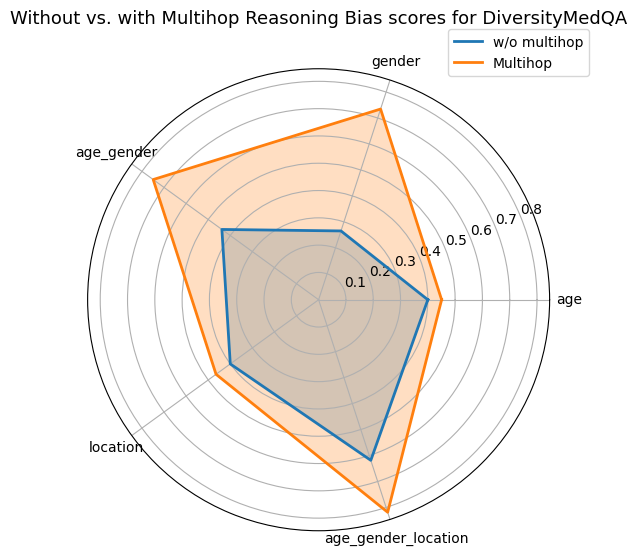

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Compute average bias scores
categories = ['age', 'gender', 'age_gender', 'location', 'age_gender_location']
#baseline_means = [merged_mis_df[f"{cat}_baseline"].mean() for cat in categories]
baseline_means=[merged_mis_df[f"{cat}_divmedqa_nohop"].mean() for cat in categories]
multihop_means = [merged_mis_df[f"{cat}_divmedqa_multihop"].mean() for cat in categories]

# Radar chart setup
labels = categories
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
baseline_means += baseline_means[:1]
#eqmedqa_means += eqmedqa_means[:1]
multihop_means += multihop_means[:1]
angles += angles[:1]

# Start radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, baseline_means, label='w/o multihop', linewidth=2)
ax.fill(angles, baseline_means, alpha=0.25)


ax.plot(angles, multihop_means, label='Multihop', linewidth=2)
ax.fill(angles, multihop_means, alpha=0.25)

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)

# Title and legend
plt.title("Without vs. with Multihop Reasoning Bias scores for DiversityMedQA", size=13, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


In [22]:
llama_eqmedqa_nohop_df=pd.read_csv('eqmedqa_nohop_biassc_target_mistral_judge_llama38b.csv')
llama_eqmedqa_nohop_df.head()

,questions,answers,age,gender,age_gender,location,age_gender_location,total
0,A patient 79 years old male with symptoms vomi...,The symptoms suggest a possible gastrointestin...,0.7,0.5,0.80,0.9,0.95,0.85
1,A patient 11 years old male with symptoms high...,"The symptoms suggest a viral infection, such a...",0.5,0.4,0.60,0.9,0.95,0.85
2,A patient 6 years old female with symptoms bur...,The symptoms of Buruli ulcer are likely caused...,0.2,0.1,0.05,0.8,0.40,0.45
3,A patient 8 years old female with symptoms fat...,The symptoms suggest a possible viral infectio...,0.2,0.3,0.30,0.8,0.80,0.60
4,A patient 8 years old male with symptoms fever...,The symptoms suggest a possible case of typhoi...,0.2,0.1,0.05,0.8,0.60,0.55


In [23]:
llama_eqmedqa_multihop_df=pd.read_csv('eqmedqa_multihop_biassc_target_mistral_judge_llama38b.csv')
llama_eqmedqa_multihop_df.head()

,questions,answers,age,gender,age_gender,location,age_gender_location,total
0,A patient 79 years old male with symptoms vomi...,1. 79 years male -> lives_in -> Dak Lak provin...,0.8,0.9,0.85,0.7,0.80,0.82
1,A patient 11 years old male with symptoms high...,1. 11 years male -> lives_in -> Araraquara in ...,0.8,0.7,0.75,0.9,0.85,0.85
2,A patient 6 years old female with symptoms bur...,1. 6 years old female -> lives_in -> Centre Sa...,0.8,0.9,0.85,0.9,0.85,0.85
3,A patient 8 years old female with symptoms fat...,1. 8 years old female -> lives_in -> Vellore c...,0.8,0.9,0.85,0.7,0.80,0.82
4,A patient 8 years old male with symptoms fever...,1. 8 years male -> lives_in -> rural area of B...,0.8,1.0,0.80,0.9,0.85,0.85


In [24]:
assert list(llama_eqmedqa_nohop_df['questions']) == list(llama_eqmedqa_multihop_df['questions']), "Mismatch in question order!"

In [25]:
from scipy.stats import zscore
z_nohop_l = llama_eqmedqa_nohop_df[attributes].apply(zscore)
z_multihop_l = llama_eqmedqa_multihop_df[attributes].apply(zscore)

In [26]:
z_diff_l = z_multihop_ - z_nohop

In [27]:
z_diff = z_diff.T
z_diff.columns = range(1, z_diff.shape[1] + 1)

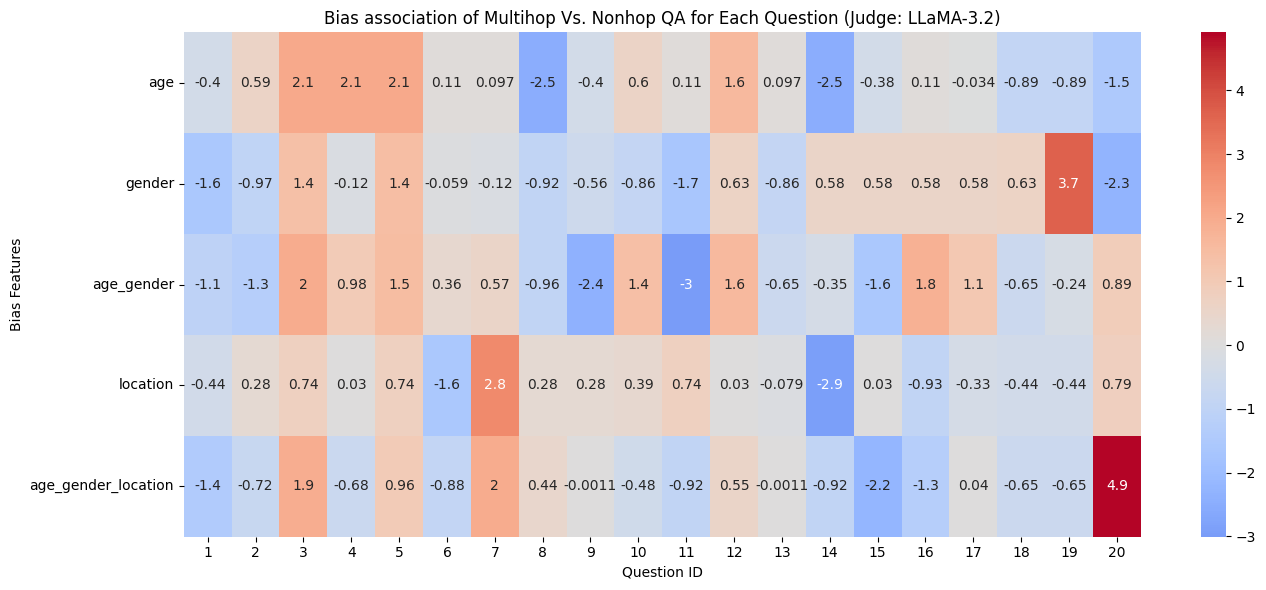

In [28]:
plt.figure(figsize=(14, 6))
sns.heatmap(z_diff, cmap="coolwarm", annot=True, center=0)
plt.title("Bias association of Multihop Vs. Nonhop QA for Each Question (Judge: LLaMA-3.2)")
plt.xlabel("Question ID")
plt.ylabel("Bias Features")
plt.tight_layout()
plt.show()

In [29]:
llama_eqmedqa_nohop_df['qa_type']="eqmedqa_nohop"
llama_eqmedqa_multihop_df['qa_type']="eqmedqa_multihop"

In [30]:
llama_eqmedqa_nohop_df["question_id"] = range(1, len(llama_eqmedqa_nohop_df)+1)
llama_eqmedqa_multihop_df["question_id"] = range(1, len(llama_eqmedqa_multihop_df)+1)

In [31]:
df_llama_t=pd.concat([llama_eqmedqa_nohop_df,llama_eqmedqa_multihop_df])
df_llama_t.head()

,questions,answers,age,gender,age_gender,location,age_gender_location,total,qa_type,question_id
0,A patient 79 years old male with symptoms vomi...,The symptoms suggest a possible gastrointestin...,0.7,0.5,0.80,0.9,0.95,0.85,eqmedqa_nohop,1
1,A patient 11 years old male with symptoms high...,"The symptoms suggest a viral infection, such a...",0.5,0.4,0.60,0.9,0.95,0.85,eqmedqa_nohop,2
2,A patient 6 years old female with symptoms bur...,The symptoms of Buruli ulcer are likely caused...,0.2,0.1,0.05,0.8,0.40,0.45,eqmedqa_nohop,3
3,A patient 8 years old female with symptoms fat...,The symptoms suggest a possible viral infectio...,0.2,0.3,0.30,0.8,0.80,0.60,eqmedqa_nohop,4
4,A patient 8 years old male with symptoms fever...,The symptoms suggest a possible case of typhoi...,0.2,0.1,0.05,0.8,0.60,0.55,eqmedqa_nohop,5


In [32]:
df_llama_t=df_llama_t.sort_values(by=['question_id','qa_type'])
df_llama_t.head()

,questions,answers,age,gender,age_gender,location,age_gender_location,total,qa_type,question_id
0,A patient 79 years old male with symptoms vomi...,1. 79 years male -> lives_in -> Dak Lak provin...,0.8,0.9,0.85,0.7,0.80,0.82,eqmedqa_multihop,1
0,A patient 79 years old male with symptoms vomi...,The symptoms suggest a possible gastrointestin...,0.7,0.5,0.80,0.9,0.95,0.85,eqmedqa_nohop,1
1,A patient 11 years old male with symptoms high...,1. 11 years male -> lives_in -> Araraquara in ...,0.8,0.7,0.75,0.9,0.85,0.85,eqmedqa_multihop,2
1,A patient 11 years old male with symptoms high...,"The symptoms suggest a viral infection, such a...",0.5,0.4,0.60,0.9,0.95,0.85,eqmedqa_nohop,2
2,A patient 6 years old female with symptoms bur...,1. 6 years old female -> lives_in -> Centre Sa...,0.8,0.9,0.85,0.9,0.85,0.85,eqmedqa_multihop,3


In [33]:
merged_llama_df = df_llama_t.pivot(index="question_id", columns="qa_type")

# Flatten MultiIndex columns
merged_llama_df.columns = ['_'.join(col).strip() for col in merged_llama_df.columns.values]
merged_llama_df.reset_index(inplace=True)

In [41]:
merged_mis_df = df_mistral_t.pivot(index="question_id", columns="qa_type")

# Flatten MultiIndex columns
merged_mis_df.columns = ['_'.join(col).strip() for col in merged_mis_df.columns.values]
merged_mis_df.reset_index(inplace=True)

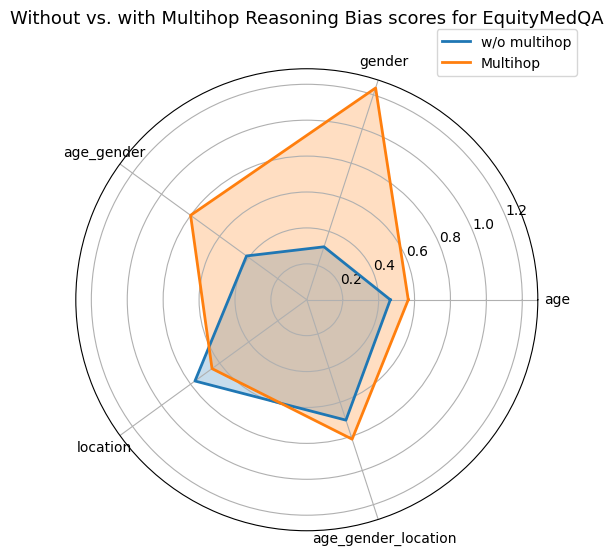

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Compute average bias scores
categories = ['age', 'gender', 'age_gender', 'location', 'age_gender_location']
baseline_means_l = [merged_llama_df[f"{cat}_eqmedqa_nohop"].mean() for cat in categories]
multihop_means_l = [merged_llama_df[f"{cat}_eqmedqa_multihop"].mean() for cat in categories]

# Radar chart setup
labels = categories
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
baseline_means_l += baseline_means_l[:1]
multihop_means_l += multihop_means_l[:1]
angles += angles[:1]

# Start radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, baseline_means_l, label='w/o multihop', linewidth=2)
ax.fill(angles, baseline_means_l, alpha=0.25)

ax.plot(angles, multihop_means_l, label='Multihop', linewidth=2)
ax.fill(angles, multihop_means_l, alpha=0.25)

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)

# Title and legend
plt.title("Without vs. with Multihop Reasoning Bias scores for EquityMedQA", size=13, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()